<a href="https://colab.research.google.com/github/RedPhoenix1190/Machine_Learning_final_assignment/blob/main/Copy_of_final_assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools

# **EDA - Exploratory Data Analysis**

## **Data Size, Types and Missing Values**

In [ ]:
df = pd.read_csv('Spaceship data.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# isnull() returns a new DataFrame of the same size as the original, but filled with boolean values:
# True where a value is missing, and False otherwise.
# sum() performs a summation over the DataFrame.
# By default (axis=0), the sum is calculated for each column (down the rows).

missing_values = df.isnull().sum()
missing_values

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


* **Missing Data:** We observe that there are missing values across almost most of the features. We will need to address this issue in the next steps.

## **Feature Distribution Analysis**

In [ ]:
df.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Ankalik Nateansive
freq,1,4602,5439,8,5915,8291,2


* **Passenger ID and Name:** There is a wide variety in the passenger IDs and names; therefore, we cannot extract relevant information or patterns from this feature for the classification task.
* **Cabin:** The original `Cabin` feature contains a very large number of unique values, making it difficult for the model to identify generalizable patterns (high cardinality). By splitting the `Cabin` into `Cabin_Deck` and `Cabin_Side`, we reduce the number of unique categories into a limited, manageable set of values.

In [ ]:
df['Cabin_Deck'] = df['Cabin'].str.split('/').str[0]
df['Cabin_Num'] = df['Cabin'].str.split('/').str[1].astype(float)
df['Cabin_Side'] = df['Cabin'].str.split('/').str[-1]

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Cabin_Deck    8494 non-null   object 
 15  Cabin_Num     8494 non-null   float64
 16  Cabin_Side    8494 non-null   object 
dtypes: bool(1), float64(7), object(9)
memory usage: 1.1+ MB


In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
df.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Cabin_Deck,Cabin_Side
count,8693,8492,8476,8494,8511,8490,8493,8494,8494
unique,8693,3,2,6560,3,2,8473,8,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Ankalik Nateansive,F,S
freq,1,4602,5439,8,5915,8291,2,2794,4288


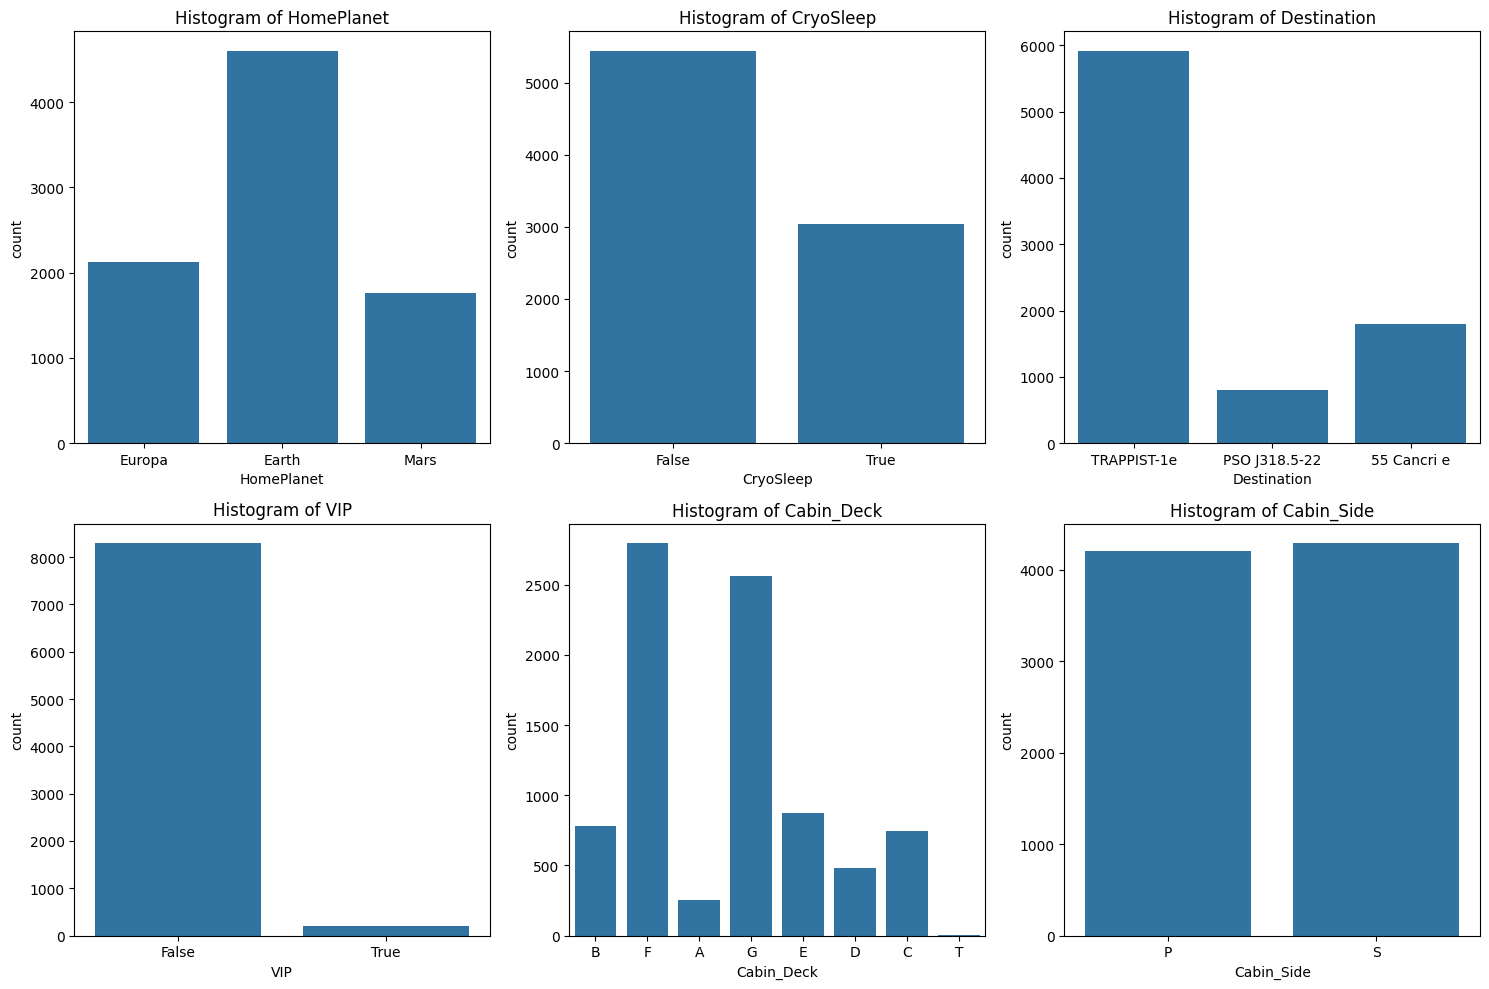

In [ ]:
# Histograms for Object variables

# The pandas.DataFrame.select_dtypes() method is used to return a subset of a DataFrame's columns based on their data types.
# The .columns is to return only the colums name without the data.
object_cols = df.select_dtypes(include=['object']).columns.drop(['PassengerId', 'Cabin', 'Name'], errors='ignore')
num_features = len(object_cols)

num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create a figure with dynamic size based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each float column and create a histogram
for i, col in enumerate(object_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Histogram of {col}')

# Automatically adjust spacing between plots
plt.tight_layout()
plt.show()

In [ ]:
df.describe(include='float64')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Num
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


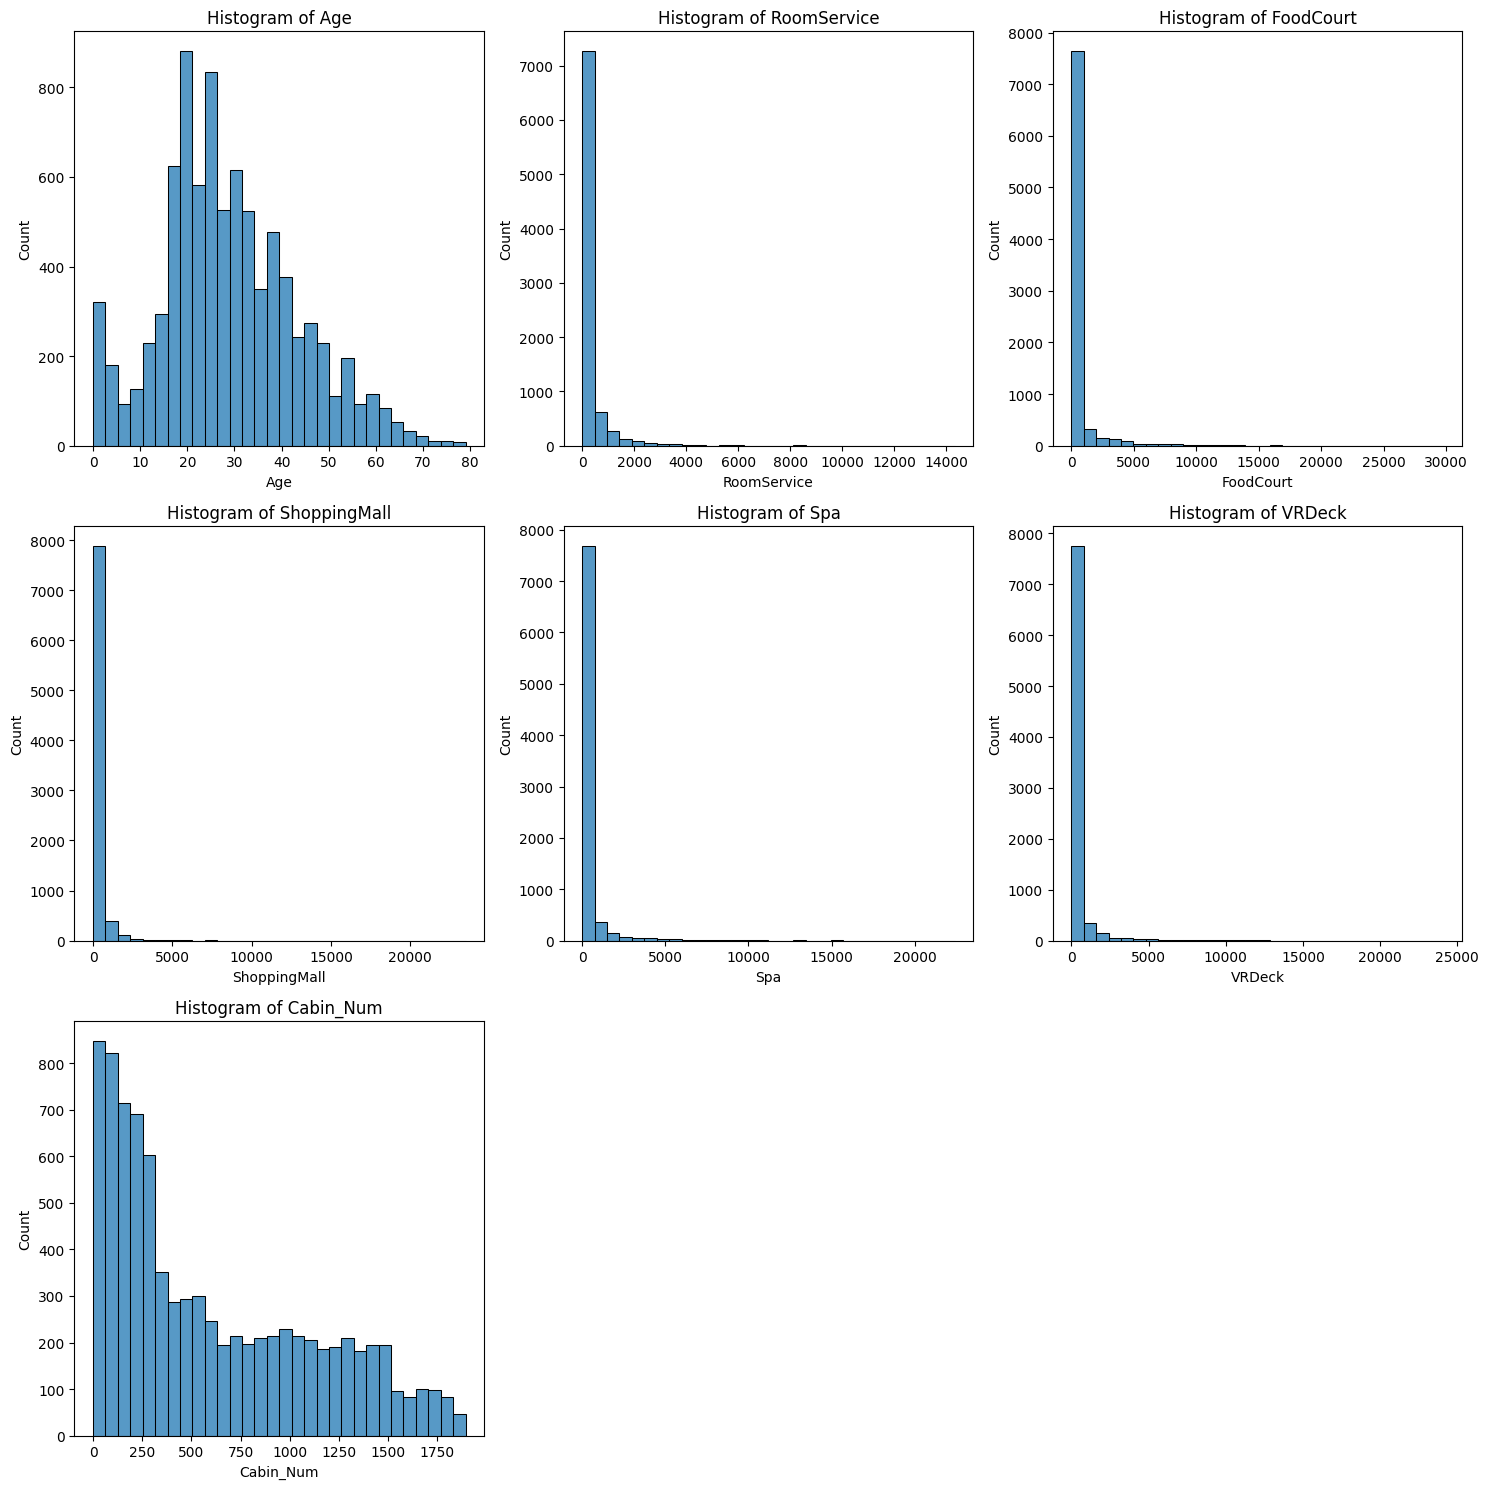

In [ ]:
# Histograms for float64 variables

# The pandas.DataFrame.select_dtypes() method is used to return a subset of a DataFrame's columns based on their data types.
# The .columns is to return only the colums name without the data.
float_cols = df.select_dtypes(include=['float64']).columns
num_features = len(float_cols)

# Calculate the number of rows needed for a 3-column layout
# Note: Using math.ceil to round up if there's a remainder
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create a figure with dynamic size based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each float column and create a histogram
for i, col in enumerate(float_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], bins=30)
    plt.title(f'Histogram of {col}')

# Automatically adjust spacing between plots
plt.tight_layout()
plt.show()

## **Target Class Distribution**

Transported
True     4378
False    4315
Name: count, dtype: int64


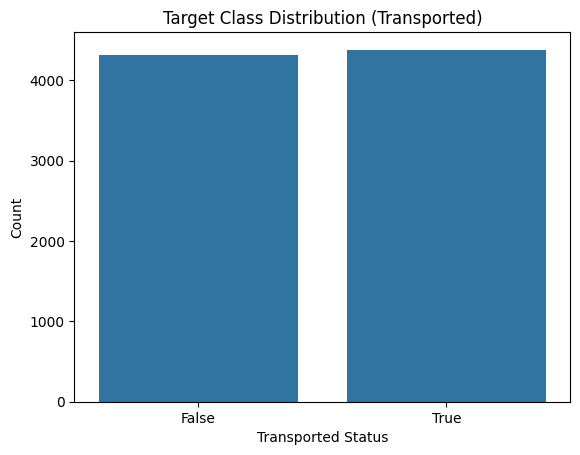

In [ ]:
# Print the exact number of True and False values
print(df['Transported'].value_counts())

sns.countplot(data=df, x='Transported')
plt.title('Target Class Distribution (Transported)')
plt.xlabel('Transported Status')
plt.ylabel('Count')
plt.show()

* **Observation:** The distribution of the target variable `Transported` is well-balanced, with approximately a 50/50 split between the two classes (True and False).
* **Significance:** A balanced dataset ensures that the model will not be biased toward a majority class, allowing for more reliable performance.

## **Feature Correlation Analysis**

### Float with Float

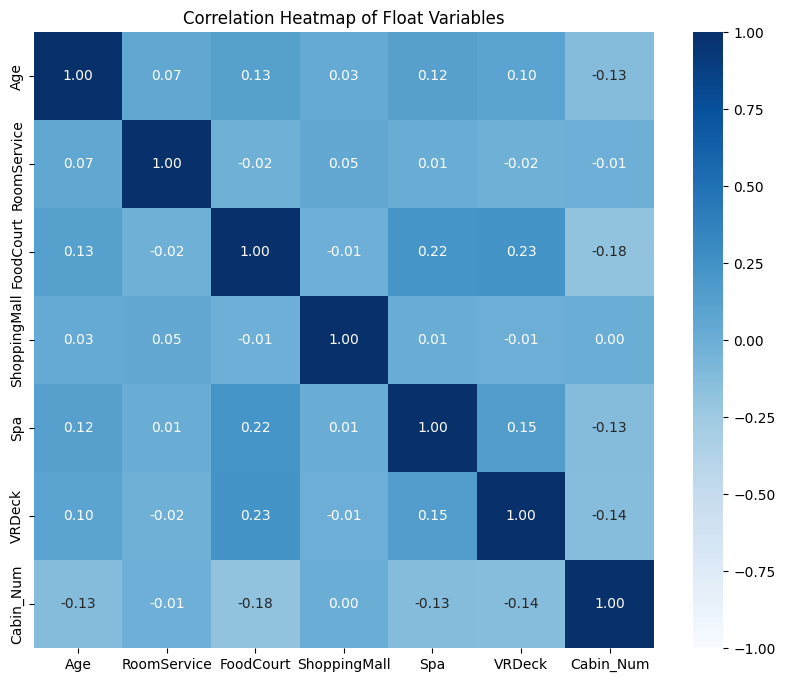

In [ ]:
# 1. Filter only float type columns
float_df = df.select_dtypes(include=['float64'])

# 2. Calculate the correlation matrix
corr_matrix = float_df.corr()

# 3. Create the Heatmap
plt.figure(figsize=(10, 8))

# 4. Create a correlation heatmap to visualize statistical relationships
# annot=True: displays numeric coefficients in the map
# cmap='coolwarm': color palette
# fmt=".2f": show only 2 numbers after the decimal point for engineering precision
# vmin/vmax: fixes the scale between -1 and 1 for objective correlation analysis
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Float Variables')
plt.show()

**Float Correlation Analysis Findings**

* **Observation:** The correlation coefficients between most numerical features are significantly low.
* **Interpretation:** This indicates a lack of strong linear relationships between the individual spending features and other numerical variables.
* **Implication:** Since no two features are highly redundant, we can retain most variables.

### Float and Object

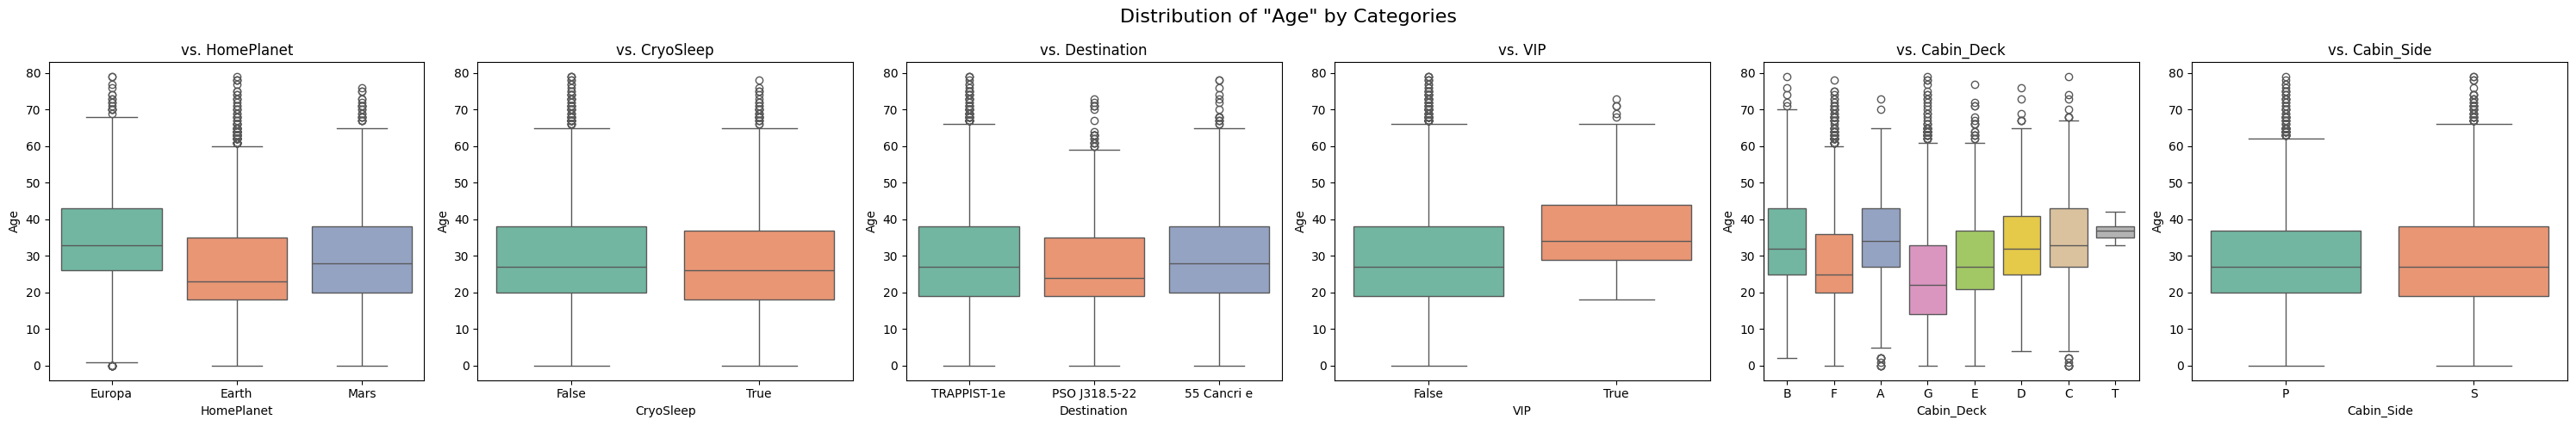

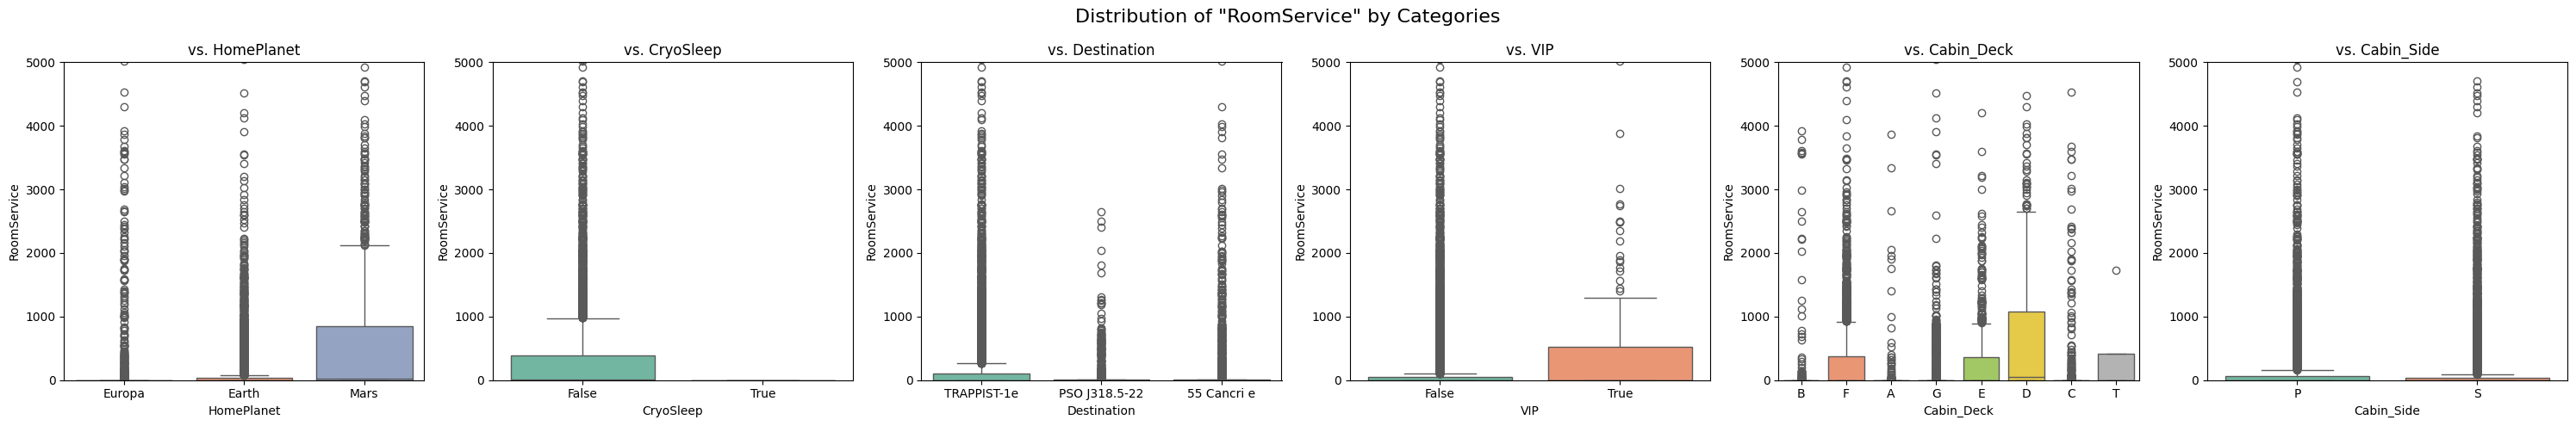

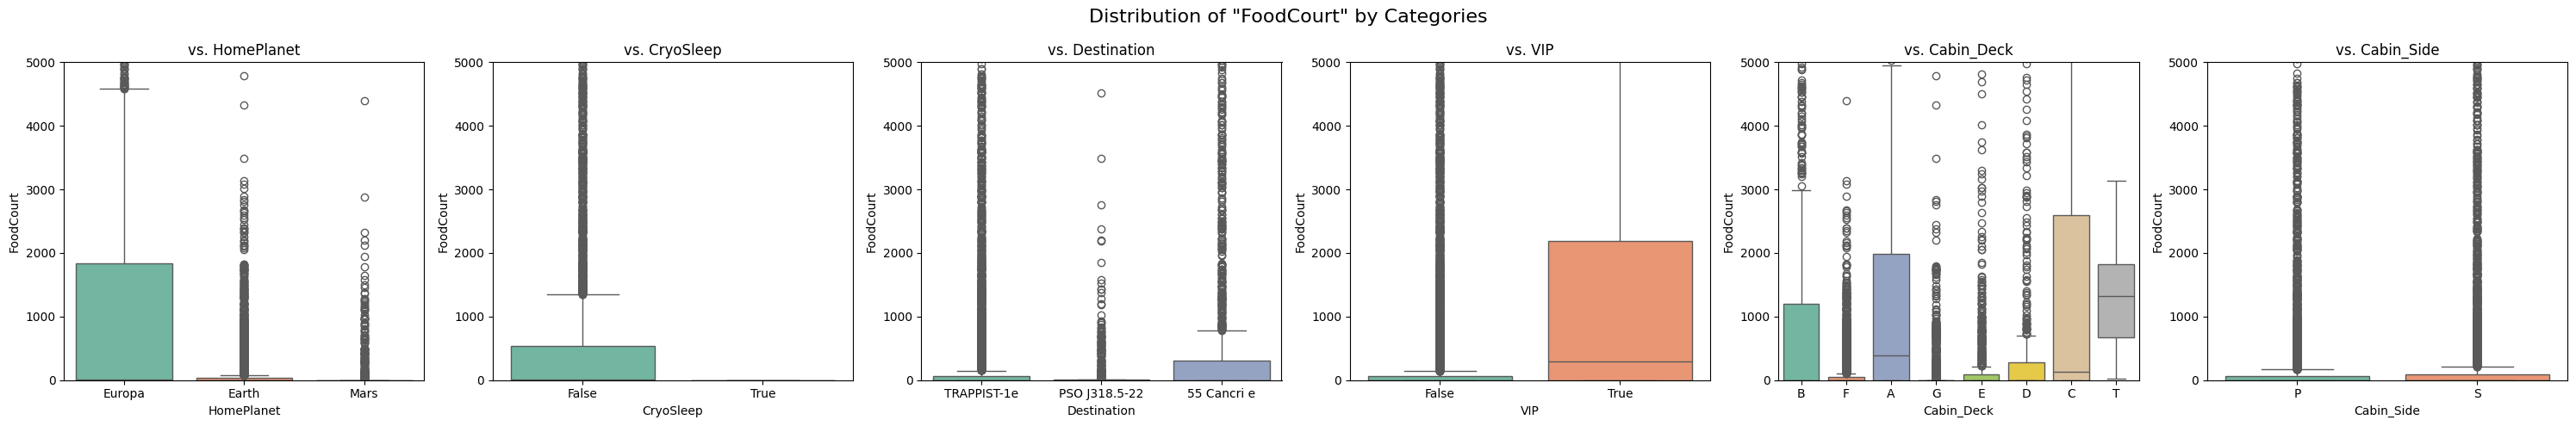

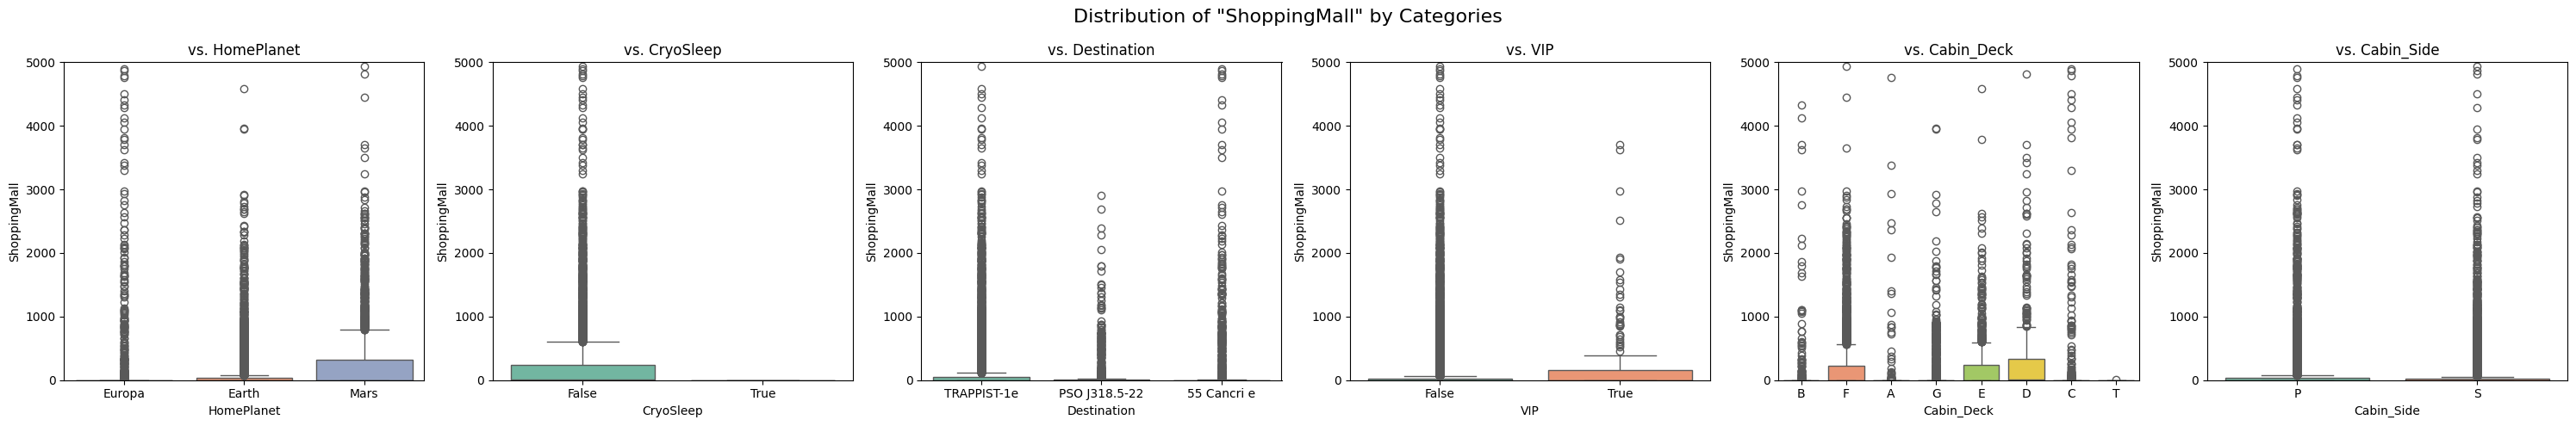

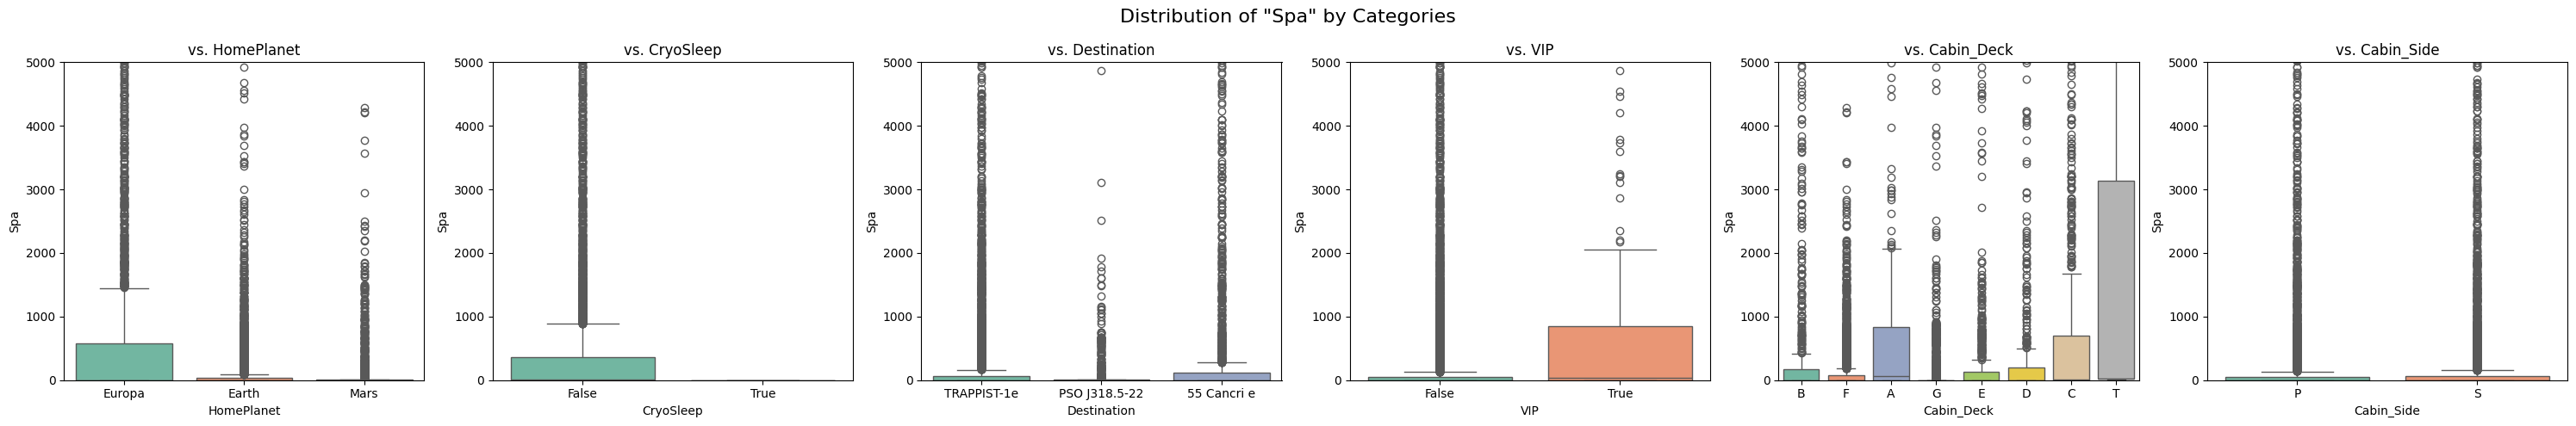

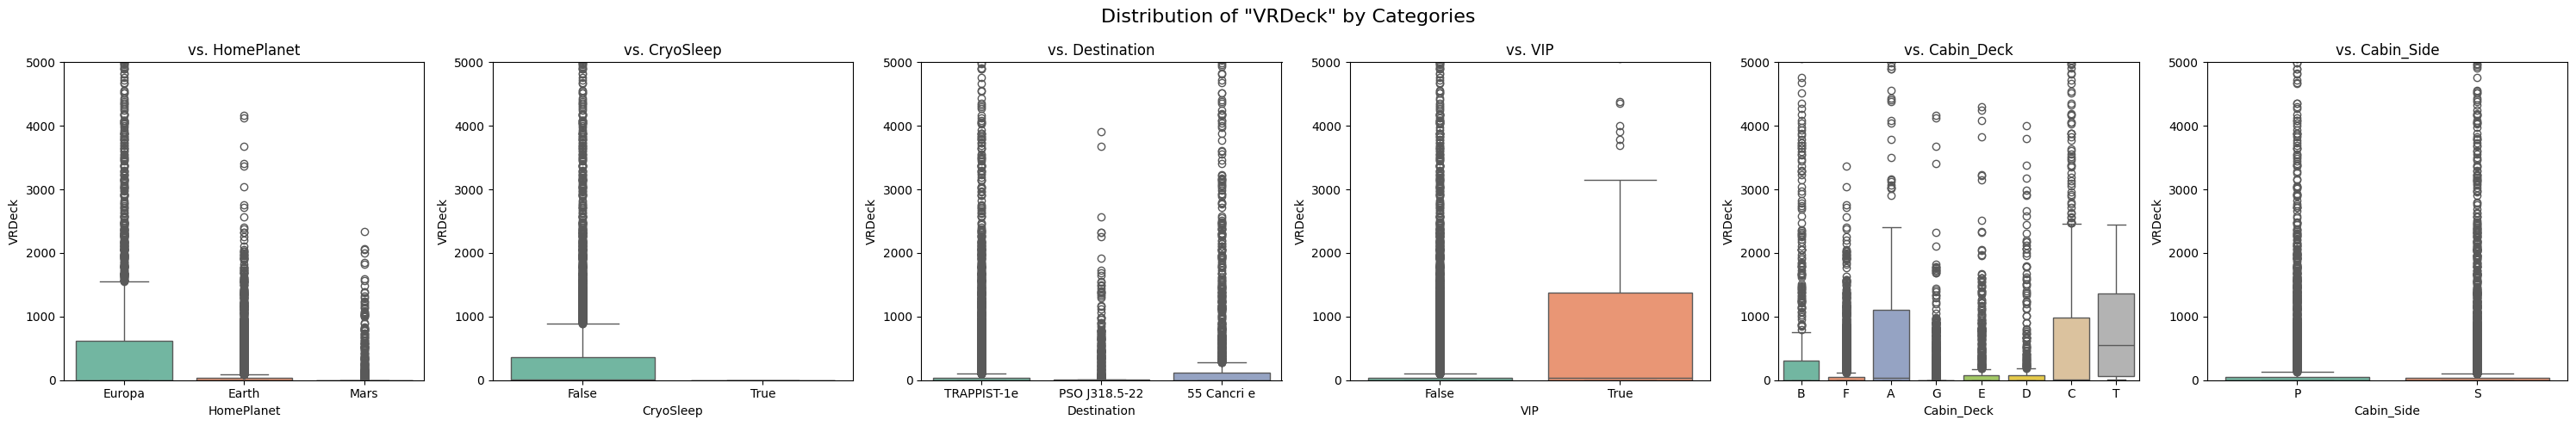

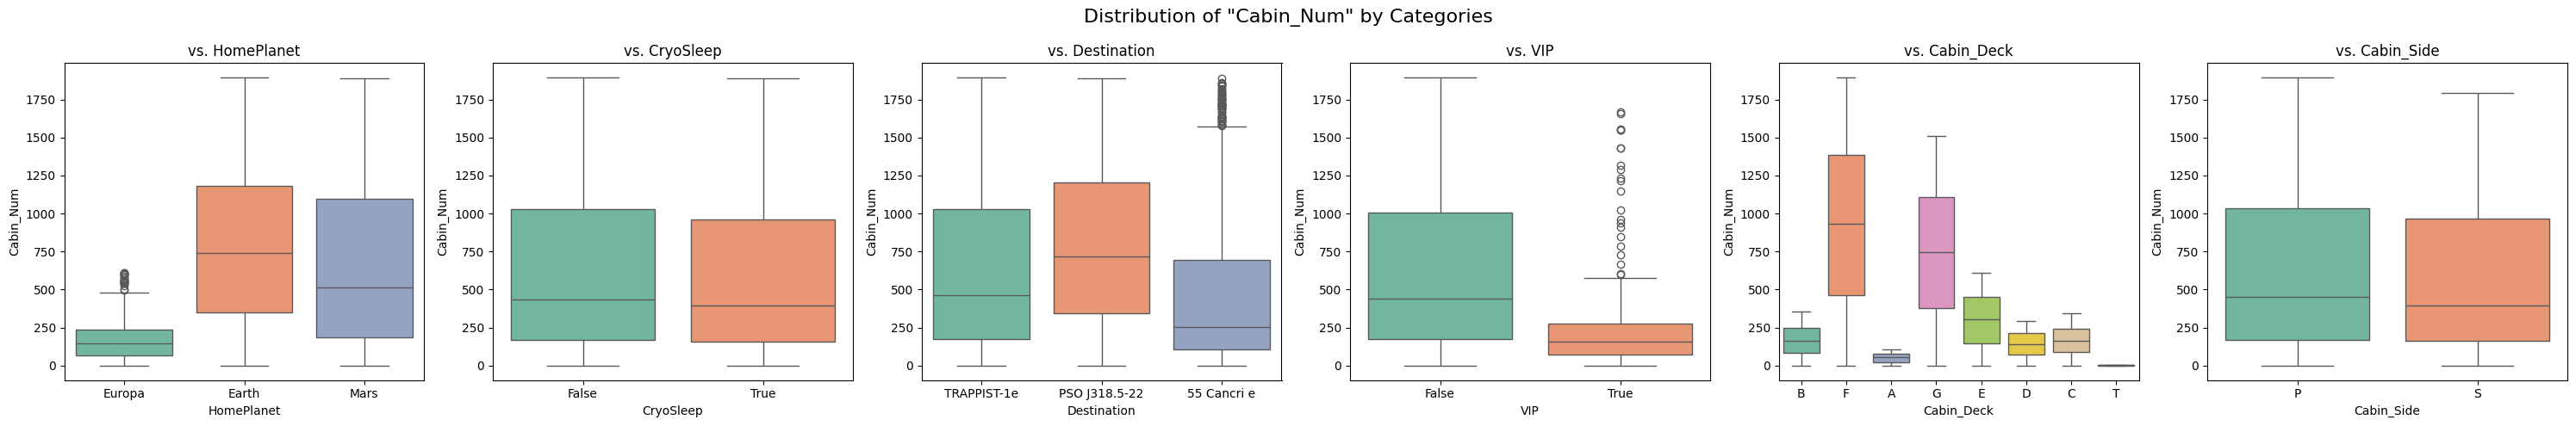

In [ ]:
# We will create a separate figure for each numerical variable
# Inside each figure, we will show its relationship with all categorical variables

# Determine the layout size (number of subplots needed)
num_plots = len(object_cols)
rows = 1
cols = num_plots

for num_col in float_cols:
    # Create the figure
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5))
    fig.suptitle(f'Distribution of "{num_col}" by Categories', fontsize=16)

    # Flatten axes array for easy iteration if plt.subplots return more than one plot
    if num_plots == 1:
        axes = [axes]
    elif hasattr(axes, 'flatten'):
        axes = axes.flatten()

    # Loop through each categorical column and plot against the current numerical column
    for i, cat_col in enumerate(object_cols):
        sns.boxplot(x=cat_col, y=num_col, hue=cat_col, legend=False, data=df, ax=axes[i], palette="Set2")
        axes[i].set_title(f'vs. {cat_col}')

        # If the numerical range is huge, limit Y-axis for better visibility
        if df[num_col].max() > 10000:
             axes[i].set_ylim(0, 5000)

    plt.tight_layout()
    plt.show()

### Object and Object

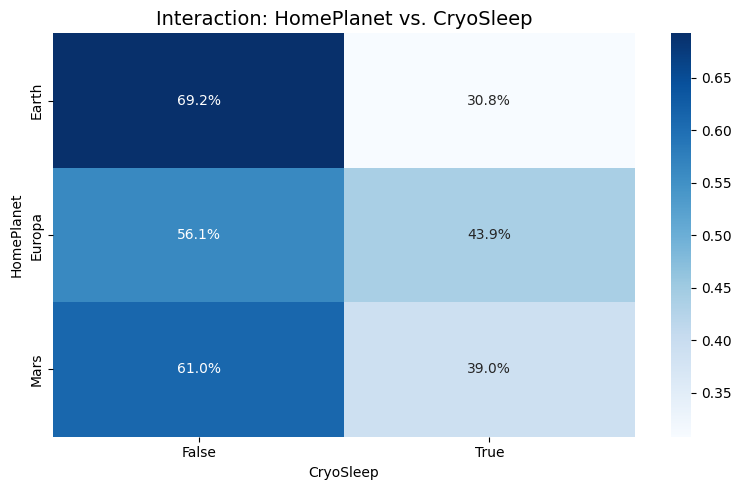

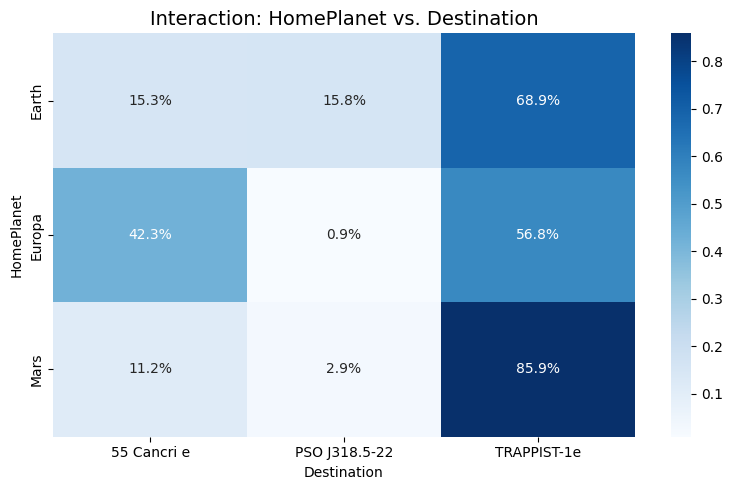

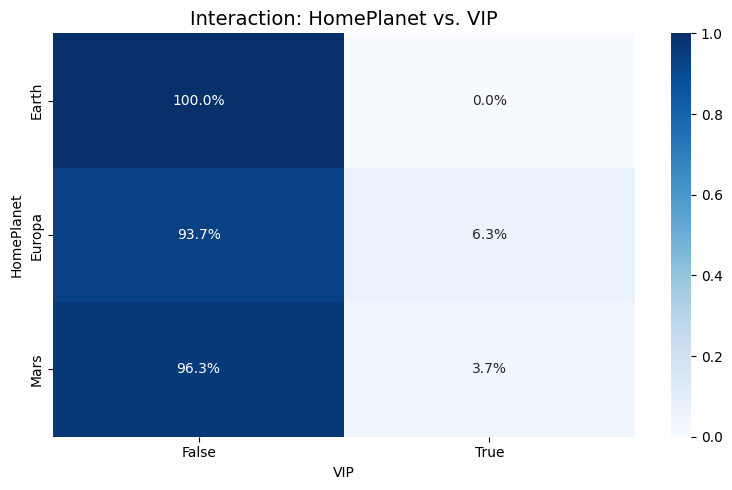

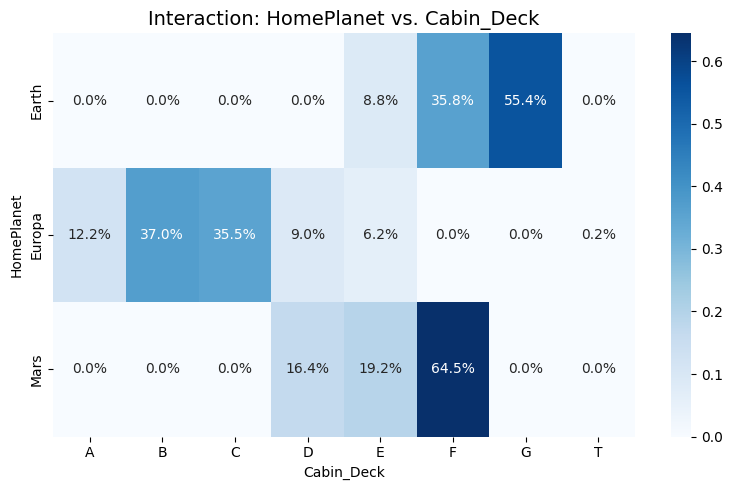

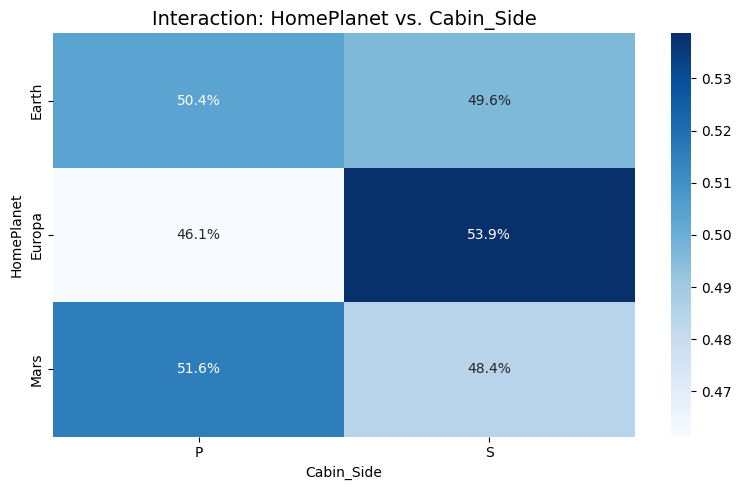

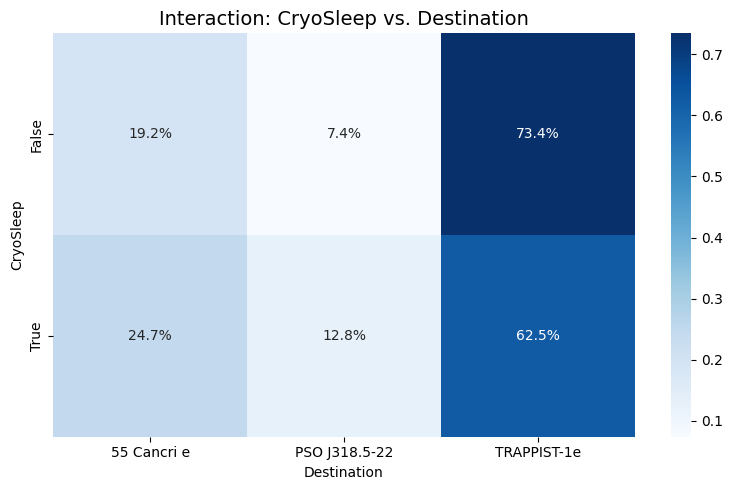

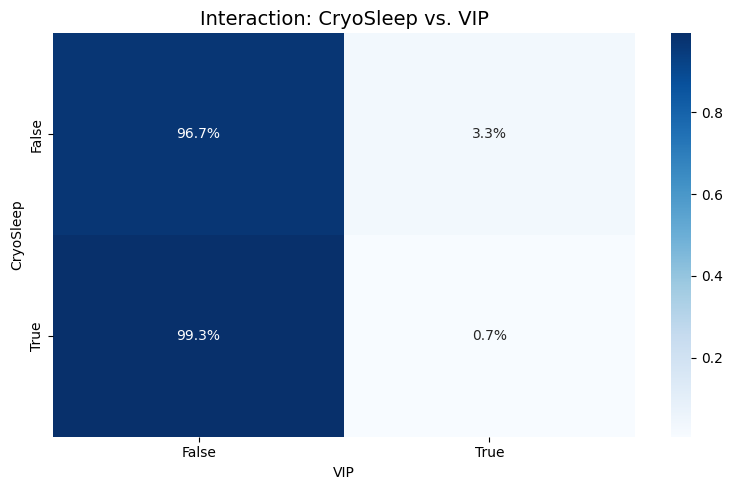

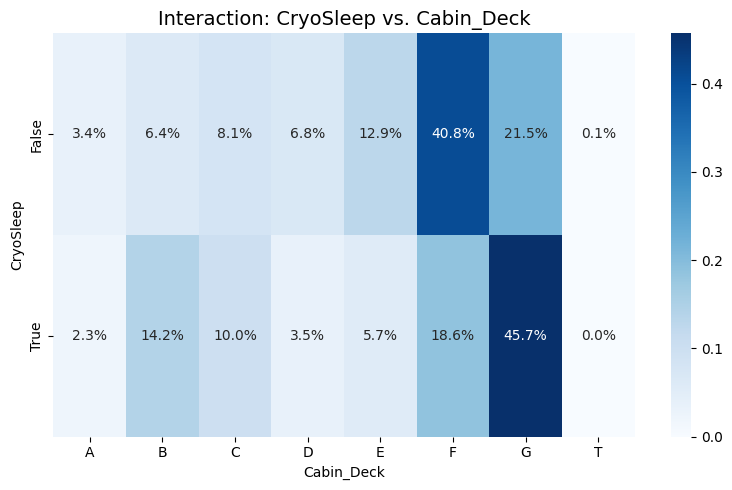

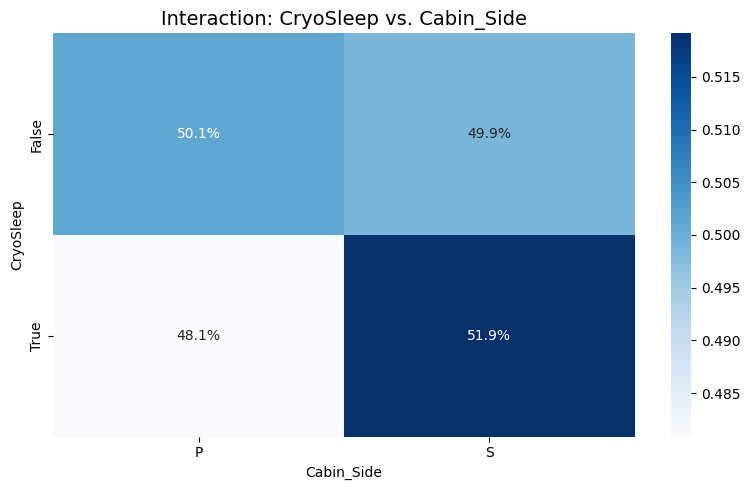

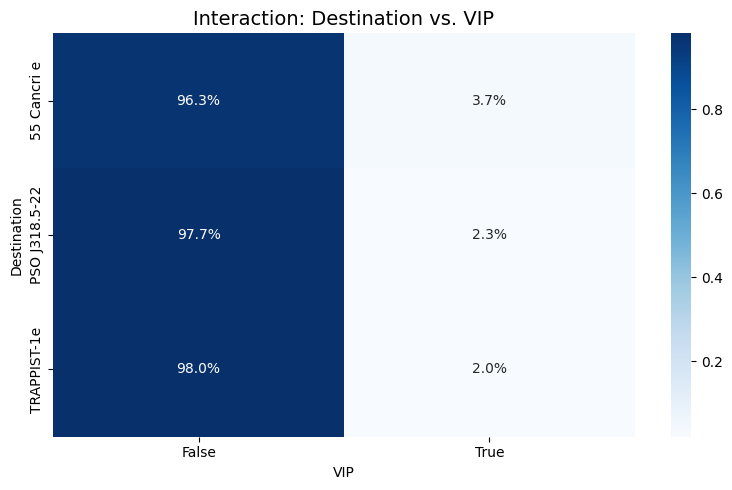

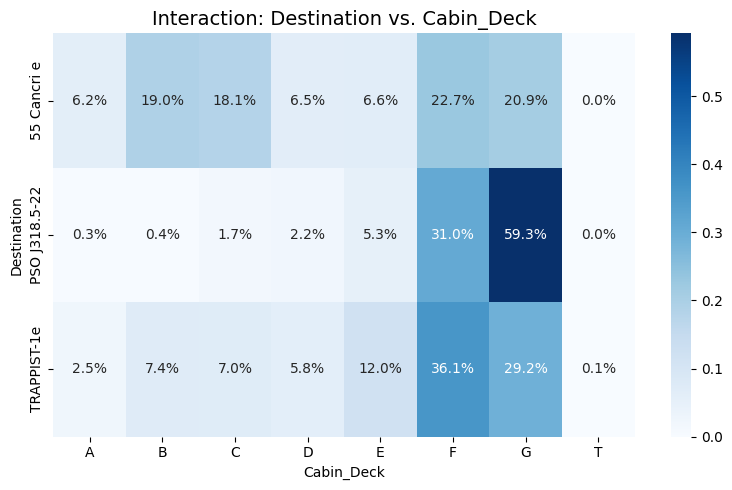

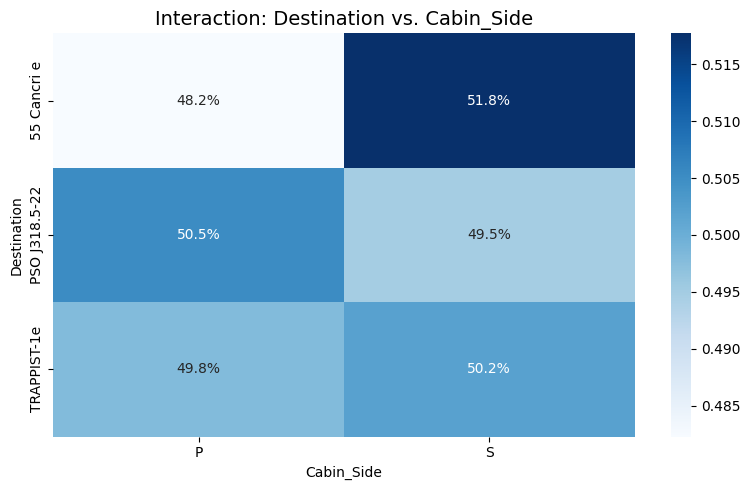

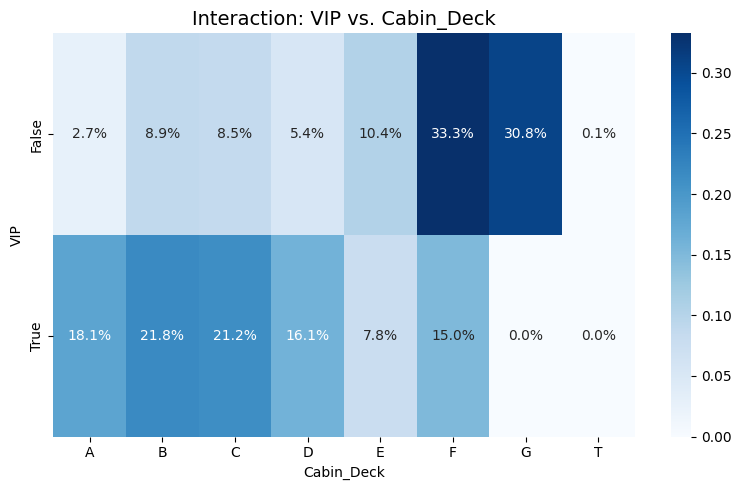

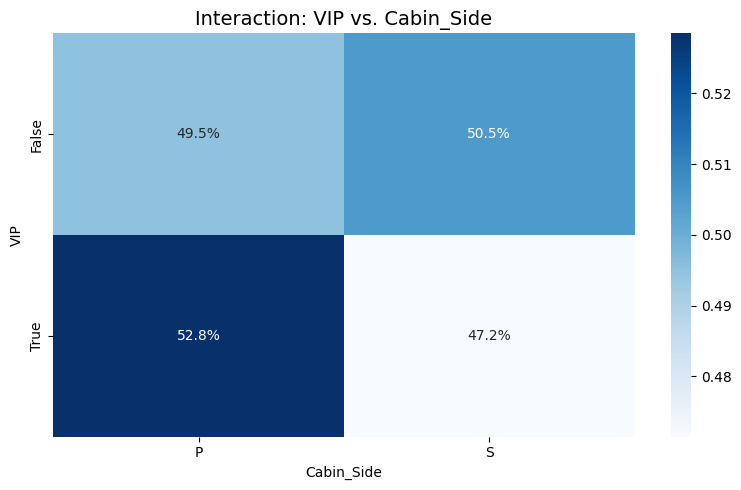

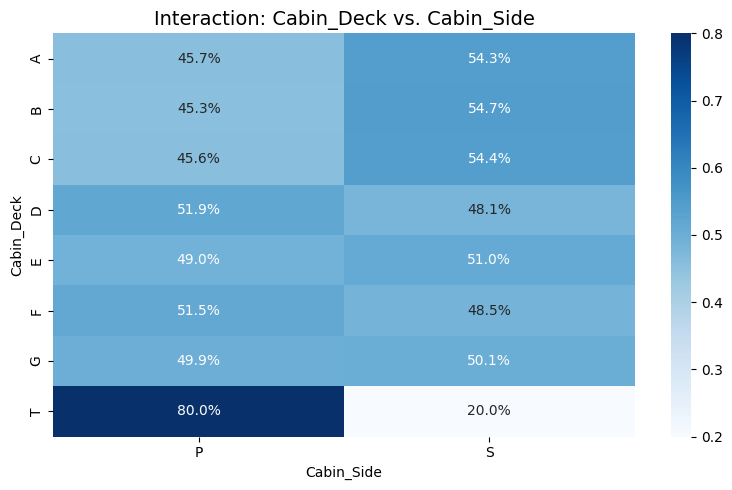

In [ ]:
# itertools.combinations will create pairs like:
# (HomePlanet, CryoSleep), (HomePlanet, Destination), etc.

pairs = list(itertools.combinations(object_cols, 2))
num_plots = len(pairs)
rows = 1
cols = num_plots

for col1, col2 in pairs:
    fig, ax = plt.subplots(figsize=(8, 5))

    # Calculate the percentage-based relationship
    # Note: Normalizing by index to see distributions within each category
    cross_tab = pd.crosstab(df[col1], df[col2], normalize='index')

    # Plotting the individual heatmap
    # annot=True: shows the % value; cmap='Blues': consistent color theme
    sns.heatmap(cross_tab, annot=True, fmt='.1%', cmap='Blues', ax=ax)

    # Labeling each plot individually
    ax.set_title(f'Interaction: {col1} vs. {col2}', fontsize=14)
    ax.set_ylabel(col1)
    ax.set_xlabel(col2)

    # Display the plot before moving to the next pair in the loop
    plt.tight_layout()
    plt.show()

**Categorical Interaction Analysis**

We explore the relationships between different categorical variables using normalized cross-tabulations:
* **Inter-variable Dynamics:** By generating all possible pairs of categorical features, we can identify hidden patterns (e.g., if passengers from a specific planet are more likely to prefer a certain destination).
* **Relative Proportions:** We use index-based normalization to represent values as percentages, providing a clearer view of the distribution regardless of the total passenger count in each category.

### Numeric Features Importance

In [ ]:
target = 'Transported'
sorted_fetures_importances = (
    df.corr(numeric_only=True)[target]
    .abs()
    .sort_values(ascending=False)
    .drop(target)
)
sorted_fetures_importances

,Transported
RoomService,0.244611
Spa,0.221131
VRDeck,0.207075
Age,0.075026
FoodCourt,0.046566
Cabin_Num,0.045097
ShoppingMall,0.010141


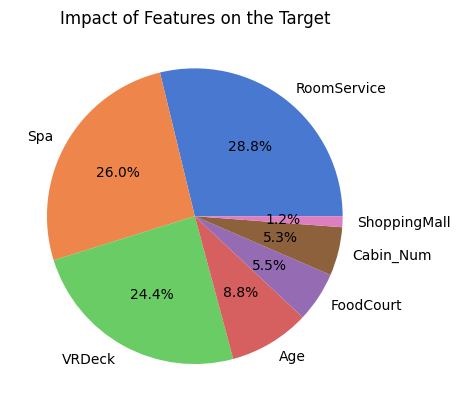

In [ ]:
plt.pie(sorted_fetures_importances,
        labels=sorted_fetures_importances.index,
        colors=sns.color_palette('muted'),
        autopct='%1.1f%%',

)
title= plt.title('Impact of Features on the Target')


plt.show()

# **Data Preproccesing**

## **Data split into Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
# axis=1 is required in drop() to specify we are removing a COLUMN, not a row
X = df.drop(['PassengerId', 'Cabin', 'Transported','Name'], axis=1)
y = df[['Transported']]
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

We have decided on a 0.25% test data size.

## **Missing values treatment**

As a general tactic, we will try to use the Data analysis to fill the missing values. Obviuosly, we would not be able to eliminitae the Null values completely based on the Data. So we will use more 'rough' methods at the end.

### Home Planet

Lets save the most frequent value.

In [ ]:
mode_homeplanet_train = X_train['HomePlanet'].mode()[0]

We have noticed, based on the Data that we have anlyzed, that Passengers on Deck G, are all from Earth. In addition to that, all the Passengers on Decks A,B,C and T are from Eruopa.

In [21]:
X_train.loc[X_train['HomePlanet'].isnull() & (X_train['Cabin_Deck'] == 'G'), 'HomePlanet'] = 'Earth'
X_test.loc[X_test['HomePlanet'].isnull() & (X_test['Cabin_Deck'] == 'G'), 'HomePlanet'] = 'Earth'
print("HomePlanet nulls in X_train after filling with 'Earth' for Cabin_Deck 'G':")
print(X_train['HomePlanet'].isnull().sum())
print("\nHomePlanet nulls in X_test after filling with 'Earth' for Cabin_Deck 'G':")
print(X_test['HomePlanet'].isnull().sum())

HomePlanet nulls in X_train after filling with 'Earth' for Cabin_Deck 'G':
110

HomePlanet nulls in X_test after filling with 'Earth' for Cabin_Deck 'G':
30


In [30]:
decks_for_europa = ['A', 'B', 'C', 'T']
X_train.loc[X_train['HomePlanet'].isnull() & (X_train['Cabin_Deck'].isin(decks_for_europa)), 'HomePlanet'] = 'Europa'
X_test.loc[X_test['HomePlanet'].isnull() & (X_test['Cabin_Deck'].isin(decks_for_europa)), 'HomePlanet'] = 'Europa'
print("HomePlanet nulls in X_train after filling with 'Europa' for Cabin_Deck 'A', 'B', 'C', 'T':")
print(X_train['HomePlanet'].isnull().sum())
print("\nHomePlanet nulls in X_test after filling with 'Europa' for Cabin_Deck 'A', 'B', 'C', 'T':")
print(X_test['HomePlanet'].isnull().sum())

HomePlanet nulls in X_train after filling with 'Europa' for Cabin_Deck 'A', 'B', 'C', 'T':
87

HomePlanet nulls in X_test after filling with 'Europa' for Cabin_Deck 'A', 'B', 'C', 'T':
22


Based on the Data, there are no VIP passengers from Earth. Hence we have assinged these passengers with Earth as the Home planet.

In [32]:
X_train.loc[X_train['HomePlanet'].isnull() & (X_train['VIP'] == False), 'HomePlanet'] = 'Earth'
X_test.loc[X_test['HomePlanet'].isnull() & (X_test['VIP'] == False), 'HomePlanet'] = 'Earth'
print("HomePlanet nulls in X_train after filling with 'Earth' for VIP=False:")
print(X_train['HomePlanet'].isnull().sum())
print("\nHomePlanet nulls in X_test after filling with 'Earth' for VIP=False:")
print(X_test['HomePlanet'].isnull().sum())

HomePlanet nulls in X_train after filling with 'Earth' for VIP=False:
6

HomePlanet nulls in X_test after filling with 'Earth' for VIP=False:
1


Since we have a few remaining Null values, we will set their value with the most common value, that we have calculated at the begining.

In [35]:
X_train['HomePlanet'] = X_train['HomePlanet'].fillna(mode_homeplanet_train)
X_test['HomePlanet'] = X_test['HomePlanet'].fillna(mode_homeplanet_train)

print("HomePlanet nulls in X_train after filling with mode:")
print(X_train['HomePlanet'].isnull().sum())
print("\nHomePlanet nulls in X_test after filling with mode:")
print(X_test['HomePlanet'].isnull().sum())

HomePlanet nulls in X_train after filling with mode:
0

HomePlanet nulls in X_test after filling with mode:
0


### Cryo Sleep

From the Data, we saw that the expenses are the Best indicator to Cryo sleep. We have created a Total Expences columnn as new feature.

In [36]:
expense_cols = ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']
X_train['TotalExpenses'] = X_train[expense_cols].sum(axis=1)
X_test['TotalExpenses'] = X_test[expense_cols].sum(axis=1)

print("First 5 rows of X_train with TotalExpenses:")
display(X_train[['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'TotalExpenses']].head())
print("\nFirst 5 rows of X_test with TotalExpenses:")
display(X_test[['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'TotalExpenses']].head())

First 5 rows of X_train with TotalExpenses:


,FoodCourt,ShoppingMall,Spa,VRDeck,RoomService,TotalExpenses
1627,0.0,0.0,135.0,0.0,852.0,987.0
5719,0.0,455.0,167.0,48.0,33.0,703.0
7373,2.0,465.0,0.0,0.0,1610.0,2077.0
6361,371.0,0.0,1701.0,21.0,0.0,2093.0
1052,46.0,0.0,743.0,0.0,98.0,887.0



First 5 rows of X_test with TotalExpenses:


,FoodCourt,ShoppingMall,Spa,VRDeck,RoomService,TotalExpenses
6398,600.0,0.0,0.0,25.0,76.0,701.0
734,0.0,0.0,0.0,0.0,0.0,0.0
6306,0.0,NaN,0.0,0.0,1002.0,1002.0
7605,0.0,0.0,0.0,0.0,0.0,0.0
1336,NaN,2011.0,17.0,32.0,13.0,2073.0


We filled the Cryo Sleep value of the passengers with no expenses with True.

In [37]:
X_train.loc[(X_train['CryoSleep'].isnull()) & (X_train['TotalExpenses'] == 0), 'CryoSleep'] = True
X_test.loc[(X_test['CryoSleep'].isnull()) & (X_test['TotalExpenses'] == 0), 'CryoSleep'] = True

print("CryoSleep nulls in X_train after filling with True for TotalExpenses == 0:")
print(X_train['CryoSleep'].isnull().sum())
print("\nCryoSleep nulls in X_test after filling with True for TotalExpenses == 0:")
print(X_test['CryoSleep'].isnull().sum())

CryoSleep nulls in X_train after filling with True for TotalExpenses == 0:
85

CryoSleep nulls in X_test after filling with True for TotalExpenses == 0:
34


And the Other way around, if a passenger is in Cryo Sleep, he can't spend anything.

In [38]:
for col in expense_cols:
    X_train.loc[(X_train[col].isnull()) & (X_train['CryoSleep'] == True), col] = 0
    X_test.loc[(X_test[col].isnull()) & (X_test['CryoSleep'] == True), col] = 0

print("Nulls after filling expenses for CryoSleep=True in X_train:")
print(X_train[expense_cols].isnull().sum())
print("\nNulls after filling expenses for CryoSleep=True in X_test:")
print(X_test[expense_cols].isnull().sum())

Nulls after filling expenses for CryoSleep=True in X_train:
FoodCourt       86
ShoppingMall    79
Spa             93
VRDeck          92
RoomService     93
dtype: int64

Nulls after filling expenses for CryoSleep=True in X_test:
FoodCourt       26
ShoppingMall    30
Spa             23
VRDeck          29
RoomService     20
dtype: int64


### Destination

## **Object Data type Encoding**

**Technical Analysis: Impact of Categorical Encoding on Classifier Performance**

In the process of feature engineering for the Spaceship Titanic dataset, we evaluate two primary encoding strategies: **Label Encoding** and **One-Hot Encoding**. The choice between these methods significantly affects the model's objective function and decision boundaries.

---

**1. Weight & Distance-Based Models (Logistic Regression, MLP)**
These models compute the output as a weighted sum of input features. For **Logistic Regression**, the predicted probability $\hat{y}$ is:

$$\hat{y} = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\sum_{j=1}^{n} w_j x_j + b)}}$$

* **Mathematical Bias:** Using **Label Encoding** (e.g., Earth=0, Europa=1, Mars=2) forces a monotonic relationship on a single dimension $x_j$. The model is mathematically constrained to assume that categories with higher indices have a higher (or lower) impact on the result, introducing a false ordinal hierarchy.
* **One-Hot Advantage:** By transforming categories into a binary sub-vector $\mathbf{x} \in \{0, 1\}^k$, we assign an independent weight $w_k$ to each category, allowing the model to learn the specific importance of each planet without numerical interference.

---

**2. Probabilistic Models (Gaussian Naive Bayes - GNB)**
GNB classifies samples by calculating the class-conditional density $P(\mathbf{x}|y)$ using the Gaussian PDF for each feature $x_j$:

$$P(x_j | y) = \frac{1}{\sqrt{2\pi\sigma_{y,j}^2}} \exp\left(-\frac{(x_j - \mu_{y,j})^2}{2\sigma_{y,j}^2}\right)$$

* **Statistical Distortion:** * **The Mean ($\mu$):** Under **Label Encoding**, the mean represents an average of arbitrary indices (e.g., $0.7$), which lacks physical meaning.
    * **The Variance ($\sigma^2$):** The model calculates distance as $(x_j - \mu_{y,j})^2$. A label of '2' (Mars) will appear much further from the mean than '0' (Earth), regardless of its actual statistical distribution.
* **Recommendation:** **One-Hot Encoding** is superior here as the mean $\mu$ of a binary feature directly represents the **category frequency**, providing a valid Likelihood estimation.

---

**3. Tree-Based Models (Decision Tree, Random Forest, XGBoost)**
Tree-based algorithms utilize logical recursive partitioning rather than algebraic transformations:

$$\text{Decision Rule: } \text{if } x_j \leq s \text{ then Left else Right}$$

* **Logic:** Since trees do not use weights ($w$) or calculate means ($\mu$) across features, they are immune to the magnitude bias of Label Encoding. They simply find the optimal threshold $s$ to separate category integers.
* **Efficiency:** For these models, **Label Encoding** is the optimal choice as it maintains lower dimensionality (fewer columns) and reduces computational overhead without compromising accuracy.


In [ ]:
# 1. Data Encoding
X_train = pd.get_dummies(X_train, columns=object_cols)
X_test = pd.get_dummies(X_test, columns=object_cols)

# 2. DataFrame Alignment
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_Num,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
7717,30.0,0.0,0.0,779.0,0.0,18.0,Leene Balderts,1575.0,True,False,...,False,False,False,False,False,True,False,False,False,True
886,38.0,0.0,0.0,0.0,0.0,0.0,Done Lunapperts,144.0,True,False,...,False,False,False,False,False,False,True,False,False,True
730,54.0,0.0,0.0,0.0,0.0,0.0,Hughy Mclardson,117.0,True,False,...,False,False,False,False,False,False,True,False,False,True
6573,20.0,559.0,0.0,83.0,112.0,0.0,Shaele Ewiseston,1130.0,True,False,...,False,False,False,False,False,False,True,False,False,True
3939,22.0,0.0,13.0,524.0,7.0,0.0,Analdy Bucknersony,865.0,True,False,...,False,False,False,False,False,True,False,False,True,False


**1. Data Encoding (One-Hot Encoding)**

```python
# Overwrite the existing X_train and X_test variables with their new encoded versions
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)
```

In this step, we overwrite the original variables (`X_train` and `X_test`) with the new result. The `pd.get_dummies` function converts columns containing categorical data into separate binary columns, where the values are only 0 or 1.

**Detailed explanation of the function arguments:**

* **The first argument (`X_train` or `X_test`)**: The data (DataFrame) the function will operate on.
* **`columns=cat_cols`**: Instructs the function to perform the conversion **only** on the columns specified in the list. Other columns in the dataset (like age or expenses) will remain unchanged. For each unique category within these columns, the function will create a new column.

**2. DataFrame Alignment**

```python
# Align them to ensure identical columns (also overwriting)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
```

This line overwrites both variables simultaneously. The `.align()` function compares the structure of two tables and synchronizes them so they have the exact same columns, in the exact same order. This step is critical because a machine learning model requires the exact same data structure during the testing phase (Test) as the one it was trained on (Train).

**Detailed explanation of the function arguments:**

* **The first argument (`X_test`)**: The second table we want to align against the first table on which the function is called (`X_train`).
* **`join='left'`**: The type of join. The value `'left'` dictates that the left table in the equation (`X_train`) is the one that determines the final structure.
    * If `X_train` has a column that does not exist in `X_test`, it will be added to `X_test`.
    * If `X_test` has a column that does not exist in `X_train`, it will be dropped.
* **`axis=1`**: Defines the axis of operation. The value `1` indicates that we are aligning the data by **columns** (using the value `0` would align by rows/indices).
* **`fill_value=0`**: Defines how to fill empty cells. If the function added a new column to `X_test` (because it existed in `X_train` but was missing in `X_test`), all values in that new column will be filled with the number `0`.